In [5]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from IPython.display import Markdown, display
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv('Indian automoble buying behavour study 1.0.csv')
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [12]:
# Shape
print("Shape -",df.shape)

Shape - (99, 13)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [14]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


Data Cleaning

In [15]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
# Cleaning Wife Working Feature 
print(df['Wife Working'].value_counts())
print("\nHere we can see, that there is unknown 'm' value, so we are converting it into 'Yes'")

# modifying wife working feature
df['Wife Working'] = df['Wife Working'].map({"Yes":"Yes", 'm':"Yes", "No":"No"})

Yes    52
No     46
m       1
Name: Wife Working, dtype: int64

Here we can see, that there is unknown 'm' value, so we are converting it into 'Yes'


Exploratory Data Analysis

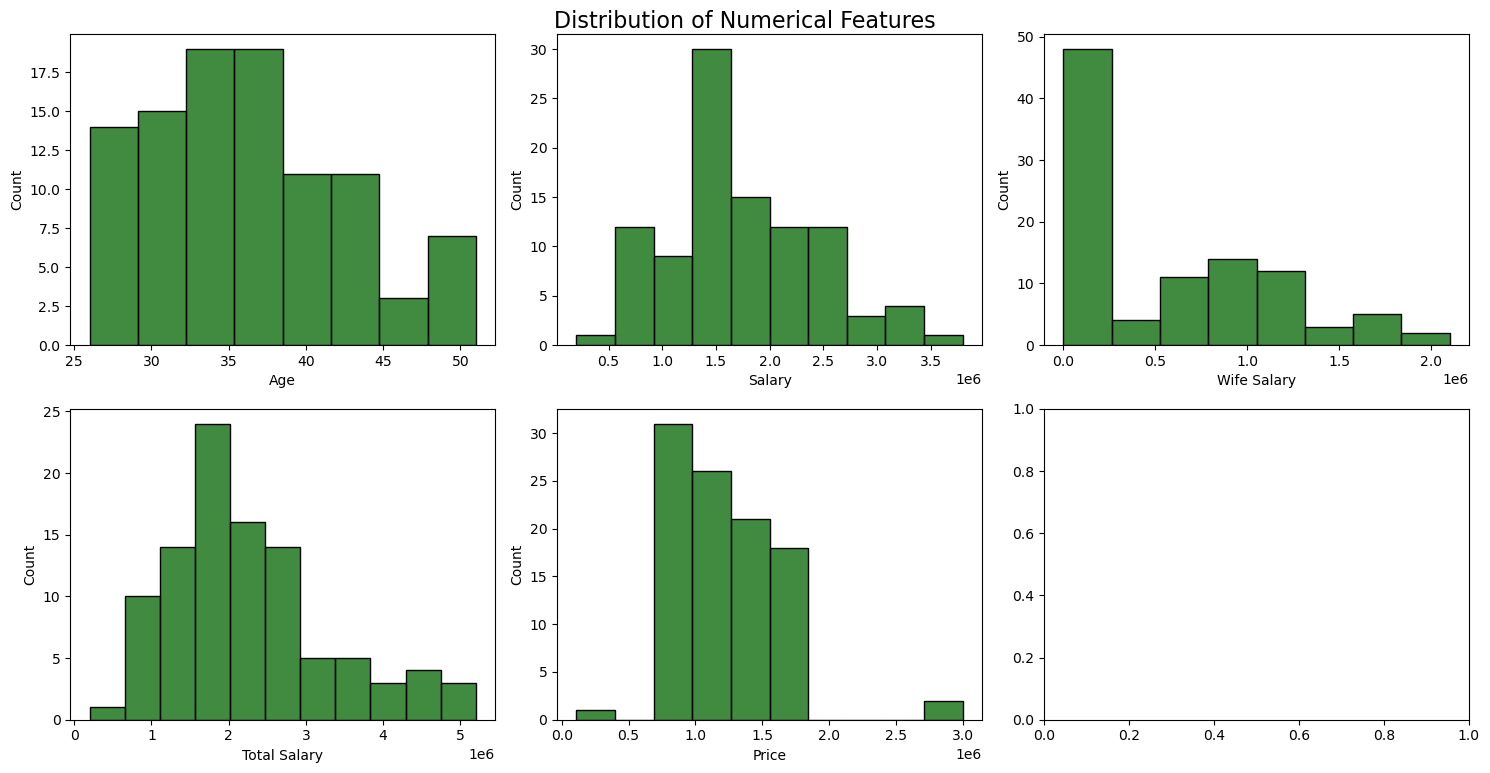

In [18]:
# Analyzing Numerical Features
num_features = ["Age", "Salary", "Wife Salary", "Total Salary", "Price"]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
for i, ax in enumerate(axs.flatten()):
    sns.histplot(data=df, x=num_features[i], ax=ax,  color='DarkGreen')
    if i==4:
        break

plt.suptitle("Distribution of Numerical Features", y=0.96, size='16');
plt.tight_layout()
plt.show()

In [27]:
# percent of customer lies between a particular range
salary_percent = round(len(df.where((df['Salary']>1000000) & (df['Salary']<=2500000)).dropna())/len(df)*100)
age_percent = round(len(df.where((df['Age']>25) & (df['Age']<=45)).dropna())/len(df)*100)
price_percent = round(len(df.where((df['Price']>700000) & (df['Price']<=1600000)).dropna())/len(df)*100)
wife_salary_percent = round(len(df[df['Wife Salary']!=0])/len(df)*100)
total_salary_percent = round(len(df.where((df['Total Salary']>1000000) & (df['Total Salary']<=3000000)).dropna())/len(df)*100) 

# Major Findings
display(Markdown(f"""
`Key Findings`
* Average ***Age*** of car buyer is around 36 and **{age_percent}%** of customer falls between the age of  25 - 45. 
* ***Salaries*** are predominantly found between 1 million and 2.5 million, with **{salary_percent}%** of customers falling within this range.
* **{price_percent}%** of Customer buys, car with ***Price*** range of 7 Lakhs to 16 lakhs.
* A majority of customers have working spouses which is around **{wife_salary_percent}%.**
* The household income for **{total_salary_percent}%** of customers falls between 1 and 3 million.
"""))


`Key Findings`
* Average ***Age*** of car buyer is around 36 and **92%** of customer falls between the age of  25 - 45. 
* ***Salaries*** are predominantly found between 1 million and 2.5 million, with **72%** of customers falling within this range.
* **79%** of Customer buys, car with ***Price*** range of 7 Lakhs to 16 lakhs.
* A majority of customers have working spouses which is around **52%.**
* The household income for **73%** of customers falls between 1 and 3 million.


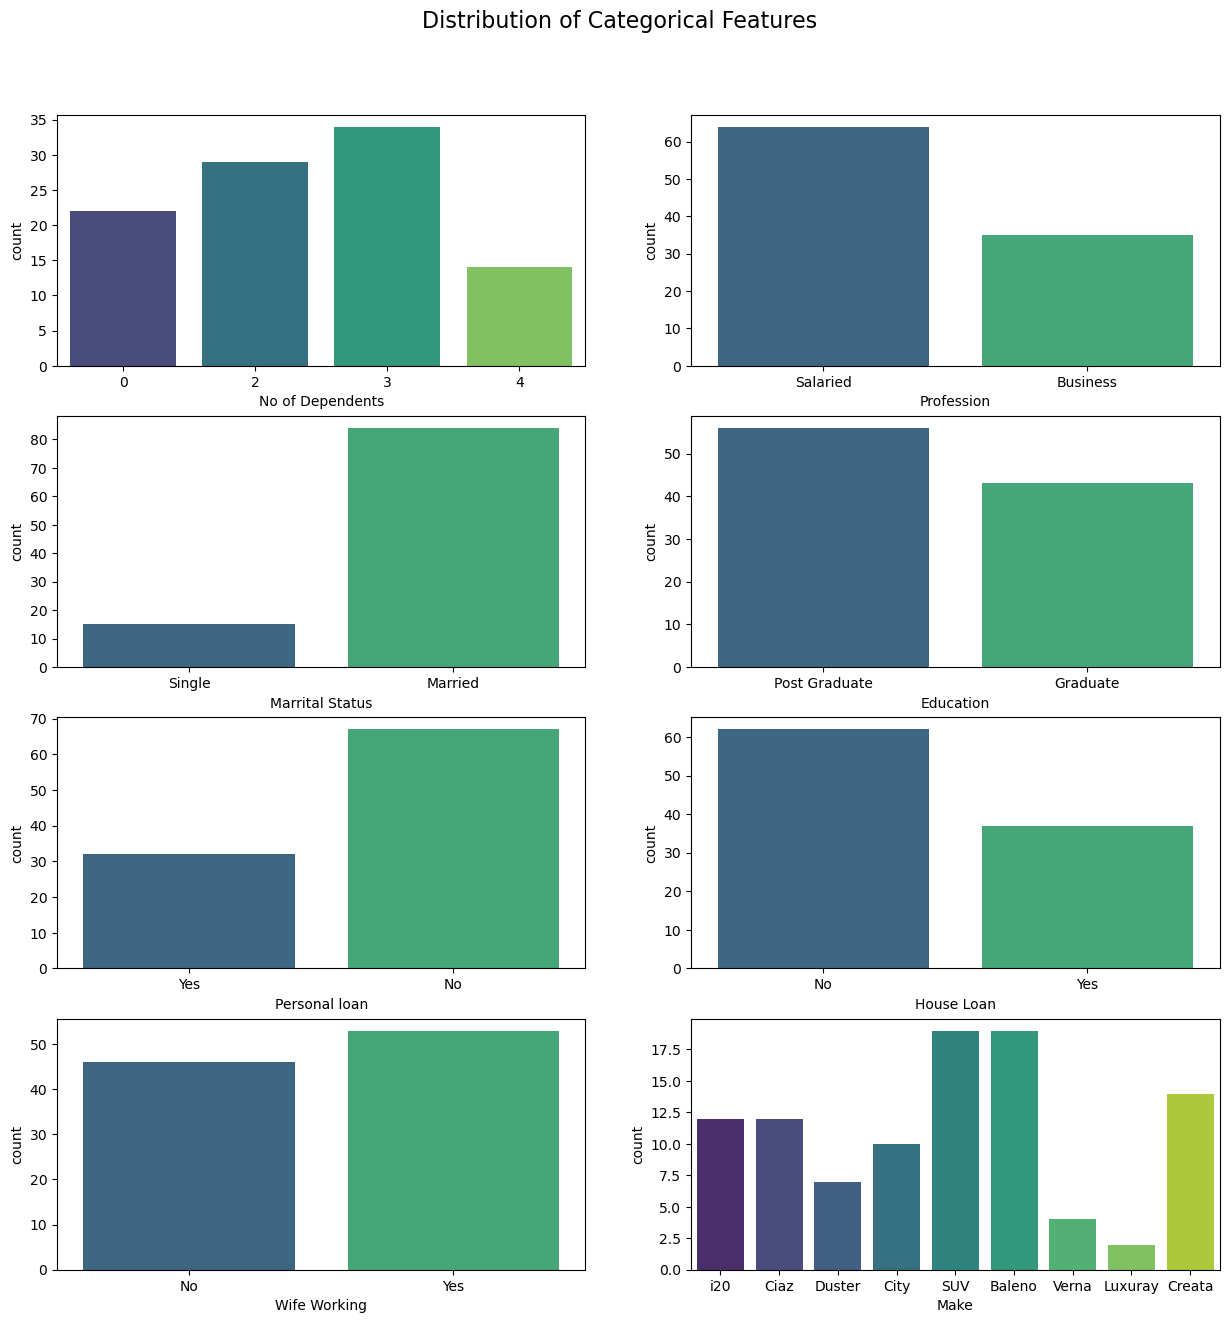

In [28]:
# Analyzing Categorical Features
cat_features = ['No of Dependents', 'Profession', 'Marrital Status', 'Education', 
                'Personal loan', 'House Loan', 'Wife Working', 'Make']

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
for i, ax in enumerate(axs.flatten()):
    sns.countplot(data=df, x=cat_features[i], ax=ax, palette='viridis')
plt.suptitle("Distribution of Categorical Features", y=0.95, size='16')

plt.show()


Data Preprocessing

In [21]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column in the DataFrame
df_encoded = df.copy()  # Make a copy of the original DataFrame to preserve it
for column in df_encoded.select_dtypes(include=['object', 'category']).columns:
    df_encoded[column] = encoder.fit_transform(df_encoded[column])

# Now df_encoded contains the encoded values
df_encoded.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,8,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6,1600000


In [34]:
# feature scaling
df_scaled = df_encoded.copy()
scaler = StandardScaler()
scaling_feature = ["Age", "Salary", "Wife Salary", "Total Salary", "Price"]
df_scaled[scaling_feature]  = scaler.fit_transform(df_scaled[scaling_feature])

Market Segmentation

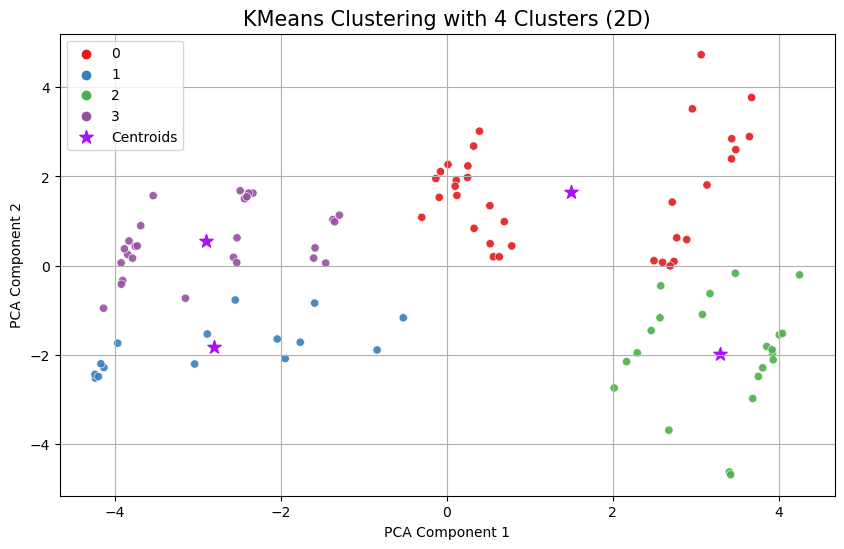

In [52]:
# Apply KMeans with 4 clusters and plotting Clusters Using PCA
Clustering = KMeans(n_clusters=4, random_state=2).fit(df_scaled)
labels = Clustering.labels_
df['Cluster'] = labels
df_encoded['Cluster'] = labels

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_scaled)

# Transform the cluster centers using the same PCA transformation
centers = pca.transform(Clustering.cluster_centers_)

# 2D Scatter Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot( x=pca_df[:, 0], y=pca_df[:, 1], hue=labels, palette="Set1", legend='full',alpha=0.9)
plt.scatter(centers[:, 0], centers[:, 1], c='#A613F5', s=100, marker='*', label='Centroids')
plt.title("KMeans Clustering with 4 Clusters (2D)", size=15)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

# Perform PCA for 3 components for 3D plotting
pca_3d = PCA(n_components=3)
pca_df_3d = pca_3d.fit_transform(df_scaled)
centers_3d = pca_3d.transform(Clustering.cluster_centers_)

fig = px.scatter_3d(x=pca_df_3d[:, 0],y=pca_df_3d[:, 1],z=pca_df_3d[:, 2],color=labels,title="KMeans Clustering with 4 Clusters (3D)",
    labels={'x': 'PCA Component 1', 'y': 'PCA Component 2', 'z': 'PCA Component 3'})

# Add cluster centroids to the 3D plot
fig.add_scatter3d(
    x=centers_3d[:, 0],
    y=centers_3d[:, 1],
    z=centers_3d[:, 2],
    mode='markers',
    marker=dict(size=5, color='red', symbol='x'),
    name='Centroids'
)

fig.show()

Profiling Segmentation

In [38]:
data_pivot = df_encoded.groupby('Cluster').mean().T
data_pivot_mean = data_pivot.mean(axis=1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

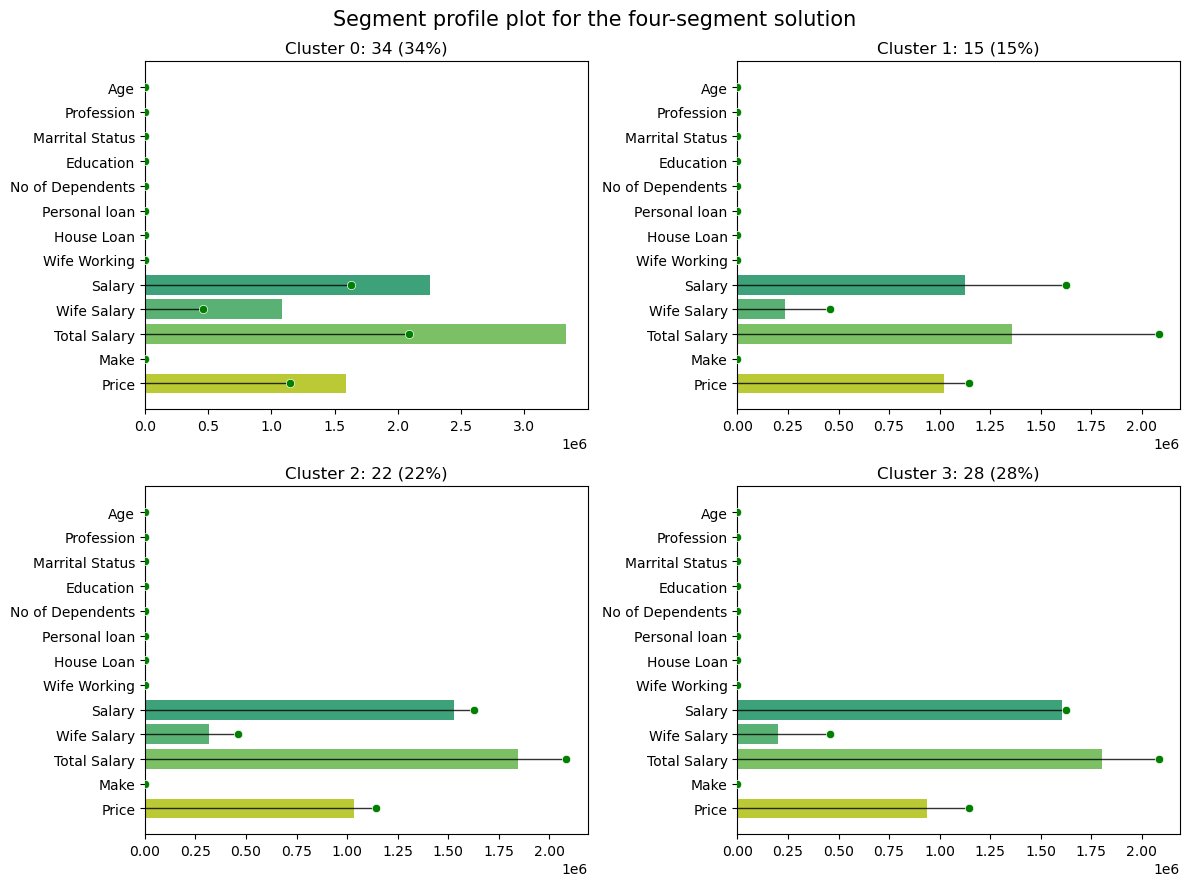

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))

for i in range(4):
    plt.subplot(2, 2, i + 1)
    
    # Ensure data_pivot has the correct structure
    column_name = data_pivot.columns[i]  # Fix indexing issue
    sns.barplot(data=data_pivot, x=column_name, y=data_pivot.index, palette='viridis')
    
    # Scatter plot with corrected syntax
    sns.scatterplot(data=data_pivot_mean, x='Value', y='Variable', color='green', zorder=3)
    
    # Adding horizontal lines
    for _, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='black', alpha=0.8, linewidth=1)
    
    # Fixing cluster count issue
    cluster_size = df_encoded['Cluster'].value_counts().get(i, 0)  # Prevents key error
    plt.title(f"Cluster {i}: {cluster_size} ({cluster_size * 100 / len(df_encoded):.0f}%)")
    
    plt.ylabel("")
    plt.xlabel("")

plt.suptitle("Segment profile plot for the four-segment solution", fontsize=15)
plt.tight_layout()
plt.show()


Describing Segmentation

In [53]:
# Separate numerical and categorical columns
numerical_columns = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']
categorical_columns = ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working', 'Make']

# Profiling numerical features
numerical_profile = df.groupby('Cluster')[numerical_columns].median()
numerical_profile['Size'] = df['Cluster'].value_counts()

# Profiling categorical features
categorical_profile = pd.DataFrame()
for col in categorical_columns:
    mode_series = df.groupby('Cluster')[col].agg(lambda x: x.mode()[0])
    categorical_profile[col] = mode_series

# Combine numerical and categorical profiles
segment_profile = pd.concat([numerical_profile, categorical_profile], axis=1)
segment_profile

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price,Size,Profession,Marrital Status,Education,Personal loan,House Loan,Wife Working,Make
Cluster,,,,,,,,,,,,,,
0,41.0,3.0,2200000.0,1200000.0,3100000.0,1500000.0,34,Salaried,Married,Post Graduate,No,No,Yes,SUV
1,29.0,0.0,1100000.0,0.0,1300000.0,1100000.0,15,Salaried,Single,Post Graduate,No,No,No,Baleno
2,34.0,2.0,1500000.0,0.0,1800000.0,800000.0,22,Salaried,Married,Post Graduate,No,No,No,i20
3,36.5,3.0,1500000.0,0.0,1900000.0,1050000.0,28,Salaried,Married,Graduate,No,Yes,No,Baleno
